# Autoencoder for image compression
To compress and reconstruct same image back

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Load the MNIST dataset
(train_images, _), (test_images, _) = mnist.load_data()

# Preprocess the data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0
train_images = train_images.reshape((len(train_images),
                                     np.prod(train_images.shape[1:])))
test_images = test_images.reshape((len(test_images),
                                   np.prod(test_images.shape[1:])))

# Define the autoencoder architecture
encoding_dim = 32  # Size of the encoded representations
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim, activation='relu')(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# Create the autoencoder model
autoencoder = Model(input_img, decoded)

# Create a separate encoder model
encoder = Model(input_img, encoded)

# Create a separate decoder model
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

# Compile the autoencoder model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(train_images, train_images,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(test_images, test_images))

# Encode and decode some images
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/50
235/235 [==============================] - 5s 15ms/step - loss: 0.2753 - val_loss: 0.1909
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1713 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1438 - val_loss: 0.1333
Epoch 4/50
235/235 [==============================] - 5s 22ms/step - loss: 0.1281 - val_loss: 0.1214
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1186 - val_loss: 0.1136
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1120 - val_loss: 0.1081
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1071 - val_loss: 0.1038
Epoch 8/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1033 - val_loss: 0.1004
Epoch 9/50
235/235 [==============================] - 4s 16ms/step - loss: 0.1003 - val_loss: 0.0983
Epoch 10/50
235/235 [=====

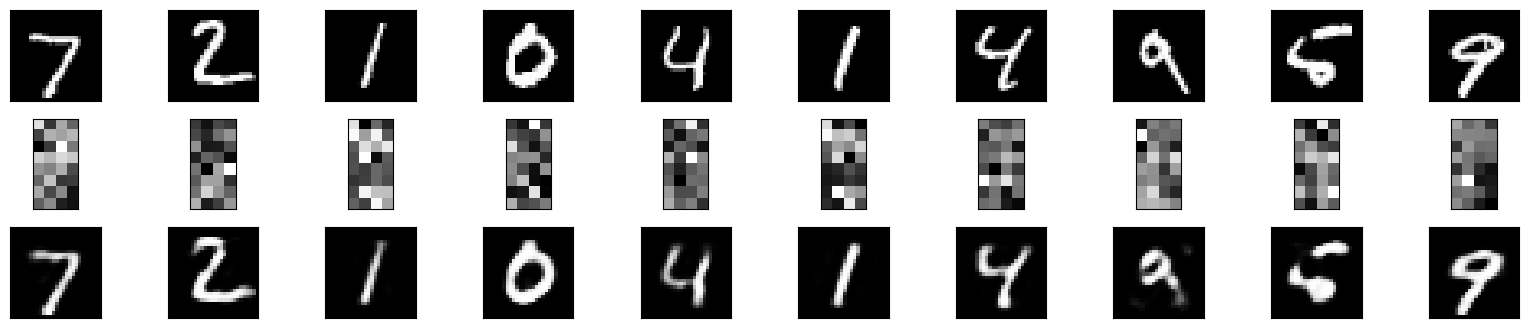

In [2]:
import matplotlib.pyplot as plt

# Number of digits to display
n = 10

# Display original images
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Display encoded images (hidden state representation)
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + n)
    # Change the reshape dimensions accordingly
    plt.imshow(encoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Display reconstructed images
for i in range(n):
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()